<a href="https://colab.research.google.com/github/priya1cvr/BITS/blob/NLP/1_PythonForNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Text Processing and Analysis 
- Load the King James version of the Bible from the Gutenberg corpus in NLTK

In [0]:
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
bible =gutenberg.open('bible-kjv.txt')
bible =bible.readlines()

In [12]:
print(type(bible))
print("\n",len(bible),"\n")
bible[:5]

<class 'list'>

 99805 



['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

#### removing all the empty newlines in our corpus and stripping away any - newline characters from other lines

In [0]:
bible=list(filter(None,[item.strip("\n") for item in bible]))

In [15]:
## Now see the 1st 5 lines of bible and length of bible
print(len(bible),"\n")
bible[:5]

74645 



['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon']

####  Visualize the overall distribution of typical sentence or line lengths across the Bible. 
- We can do that by computing the length of each sentence and then visualize this using a histogram

In [16]:
line_lengths =[len(sentence) for sentence in bible]
print(line_lengths[:10])

[22, 41, 40, 58, 67, 70, 7, 58, 70, 18]


Text(0.5, 1.0, 'Visualizing sentence length distributions in the Bible')

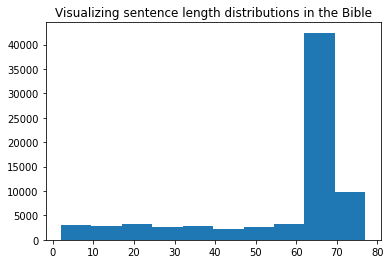

In [20]:
plt.hist(line_lengths)
plt.title("Visualizing sentence length distributions in the Bible")

- Observation : It looks like most of the sentences are 65-70 characters long

- Let's look at the total words per sentence distribution now. To get that distribution, first let's look at a way to tokenize each sentence in our corpus.


In [22]:
tokens = [item.split() for item in bible]
print(tokens[:5])

[['[The', 'King', 'James', 'Bible]'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'], ['1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon']]


- Now that we have tokenized each sentence, we just have to compute the length of each sentence to get the total words per sentence and build a histogram to visualize this distribution. 

[4, 8, 7, 11, 13, 16, 1, 12, 15, 3] 




(array([4.7790e+03, 4.1190e+03, 3.8140e+03, 3.4870e+03, 1.9240e+03,
        8.3140e+03, 2.6832e+04, 1.9577e+04, 1.7910e+03, 8.0000e+00]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

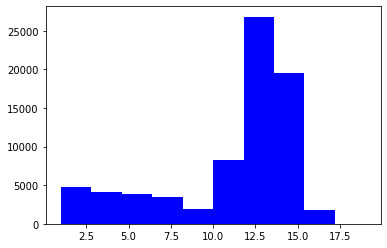

In [24]:
total_tokens_per_line = [len(sentence.split()) for sentence in bible]
print(total_tokens_per_line[:10],"\n\n")
plt.hist(total_tokens_per_line,color='blue')

- Conclusion: Most sentences in the Bible have roughly 12-15 words, or tokens, in them

###  Let's now try to determine the most common words in the Bible corpus

In [25]:
### The first step involves flattening this big list of lists (each list is a tokenized sentence of words) into one big list of words.
words = [word for sentence in tokens for word in sentence]
words[:20]

['[The',
 'King',
 'James',
 'Bible]',
 'The',
 'Old',
 'Testament',
 'of',
 'the',
 'King',
 'James',
 'Bible',
 'The',
 'First',
 'Book',
 'of',
 'Moses:',
 'Called',
 'Genesis',
 '1:1']

- We have our big list of tokens from our corpus. However, you can see the tokens are not totally clean and we have some unwanted symbols and special characters in some of the words. Let's use the power of regular expressions now to remove them

In [0]:
import re
words = list(filter(None, [re.sub(r'[^A-Za-z]', "", word) for word in words]))

In [30]:
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


- We just removed anything that was not an alphabetical character. Thus all numbers and special characters were removed. We can now determine the most frequent words using the following code.

In [32]:
from collections import Counter 
words =[word.lower() for word in words ]
c=Counter(words)
c.most_common(10)

[('the', 64023),
 ('and', 51696),
 ('of', 34670),
 ('to', 13580),
 ('that', 12912),
 ('in', 12667),
 ('he', 10419),
 ('shall', 9838),
 ('unto', 8997),
 ('for', 8970)]

- We see a lot of general filler words like pronouns, articles, and so on are the most frequent words, which makes perfect sense. But this doesn't convey much information. What if we could remove these words and focus on the more interesting ones? One approach could be to remove these filler words, popularly known as stopwords, and then compute the frequency as follows.

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
words =[word.lower() for word in words if word.lower() not in stopwords]
c=Counter(words)
c.most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]

- We see that the results are better than before; however, many words are still filler or stopwords. This is more colloquial English, hence they are not a part of the standard English stopwords list so they were not removed. We can always build a custom stopword list as needed.